# <font color=red>SEASONALITY

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/SeasonalplotUS.png/330px-SeasonalplotUS.png')

# <font color=red>TREND

In [ ]:
Image(url='https://www.slideteam.net/media/catalog/product/cache/960x720/u/p/upward_and_downward_trend_template_good_ppt_example_Slide01.jpg')

# <font color=pink>DATA INGESTION

In [2]:
import pandas as pd
df=pd.read_csv('Tata_Global_Beverages.csv',index_col=0)

In [ ]:
df.shape

(1487, 8)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

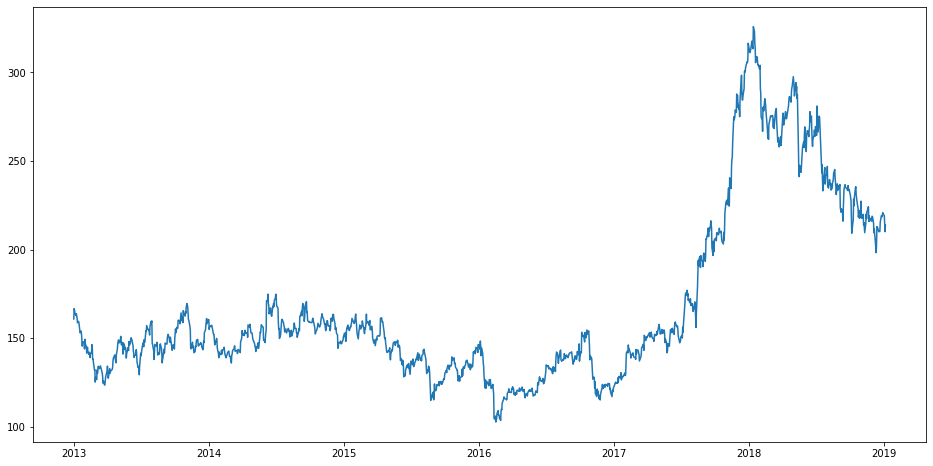

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

# <font color=yellow>Statistical tests for time series data

## <font color=cyan>1.Test for Auto-correlation

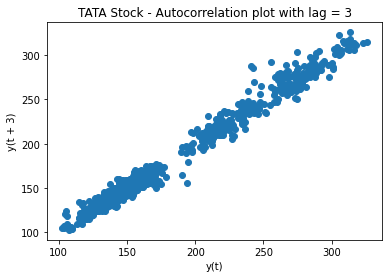

In [ ]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('TATA Stock - Autocorrelation plot with lag = 3')
plt.show()

### <font color=blue>We can see that autocorrelation exists in our data so we can apply some time series models like the ones below</font>

## <font color=cyan>2.ADF(Augmented Dickey-Fuller Test)

### <font color=blue>Stationarity is an important concept in time-series and any time-series data should undergo a stationarity test before proceeding with a model. We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not.</font>

In [ ]:
from pmdarima.arima import ADFTest
datas=df.copy()
datas = datas[['Date', 'Close']]
datas.set_index('Date',inplace=True)
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(datas)

(0.7885011614124464, True)

## <font color=blue>From the above results,we can see that the data is stationary,meaning that there is no seasonality or trend in our data at all

# We are going to try 3 techniques to forecast our stock closing price.
### <font color=teal>1. Prophet</font>
### <font color=lightgreen>2. ARIMA(Auto-Regressive Integrated Moving Average)</font>
### <font color=magenta>3. LSTM(Long Short Term Memory)</font>

# =======================================================

# <font color=teal>1. Prophet</font>

### A time series forecasting library that captures seasonality in the past data really well especially when the data is huge

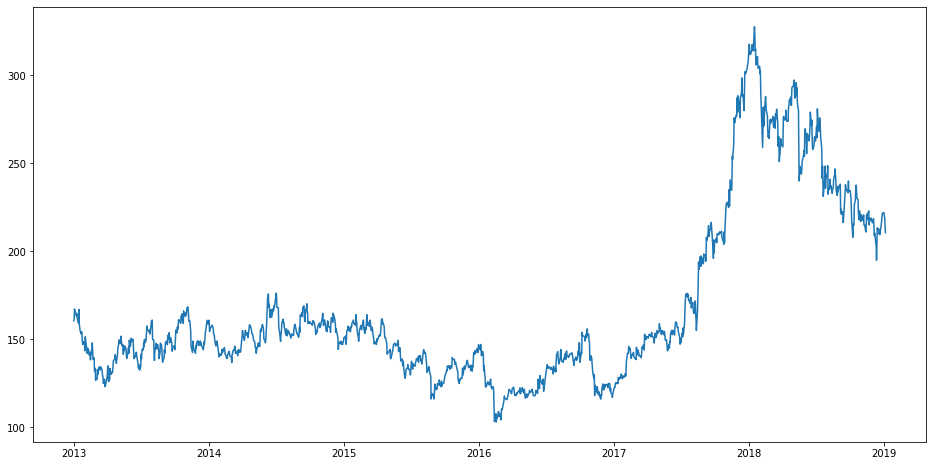

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Open'])

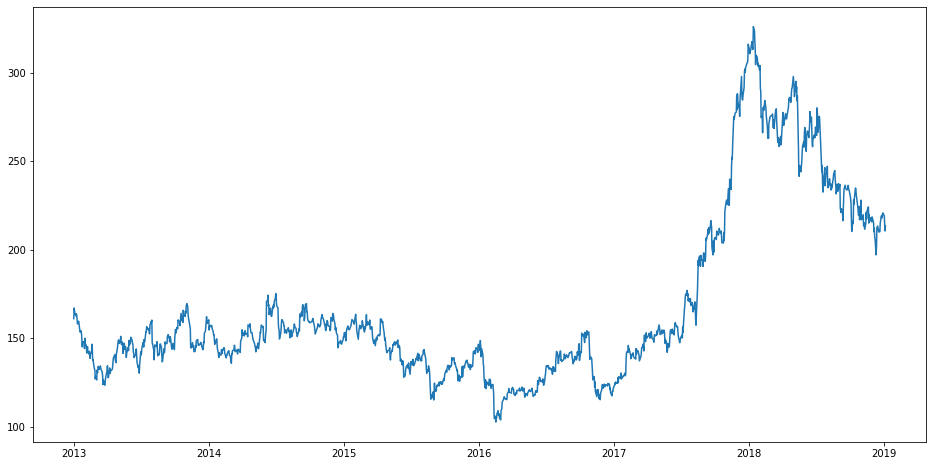

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Last'])

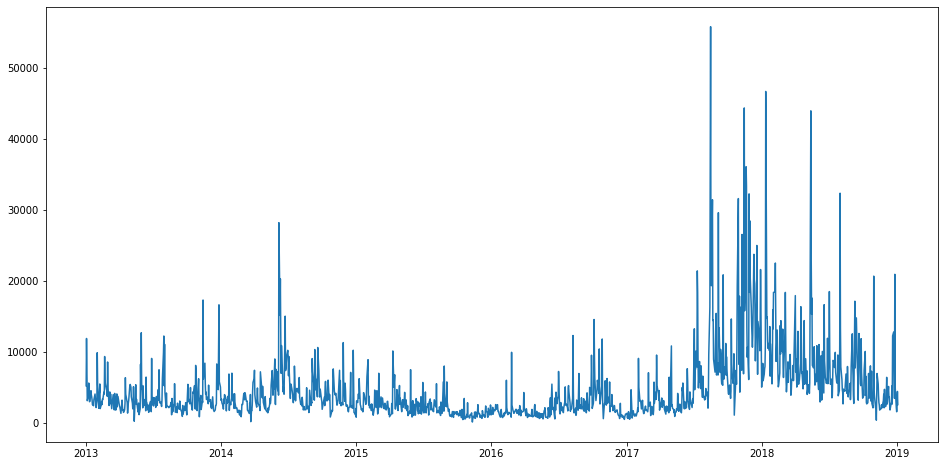

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Turnover (Lacs)'])

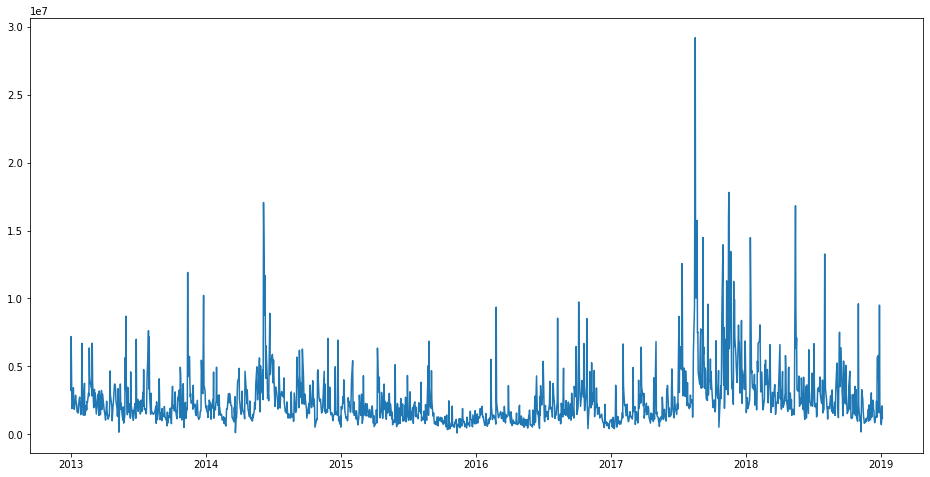

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Total Trade Quantity'])

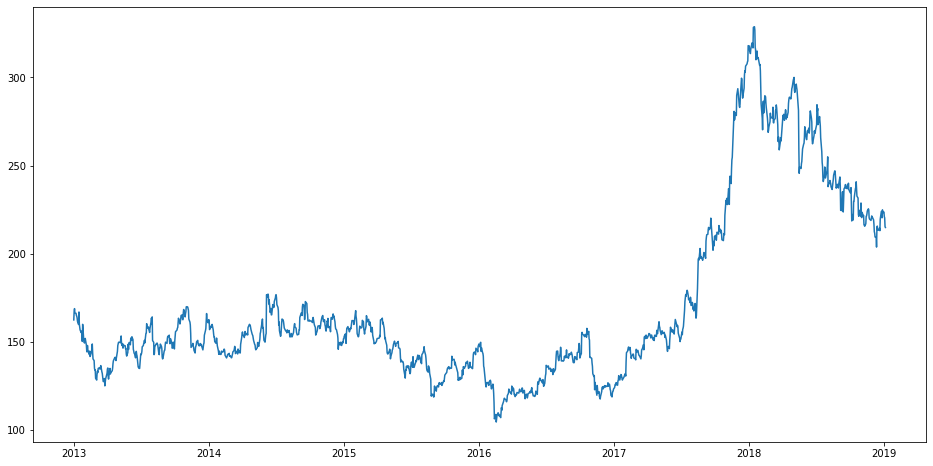

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['High'])

In [ ]:
from fbprophet import Prophet
import numpy as np
new_data=df.copy()
new_data = new_data[['Date', 'Close']]
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']
new_data['year']=new_data['Date'].apply(lambda x:x.year)
new_data.rename(columns={'Close': 'y', 'Date': 'ds','year':'yrs'}, inplace=True)
train = new_data[new_data['yrs']<2018]
valid = new_data[new_data['yrs']>=2018]
train.drop('yrs',axis=1,inplace=True)
valid.drop('yrs',axis=1,inplace=True)
model = Prophet(daily_seasonality=True)
model.fit(train)
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)
forecast_valid = forecast['yhat'][989:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



102.07179291472436

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



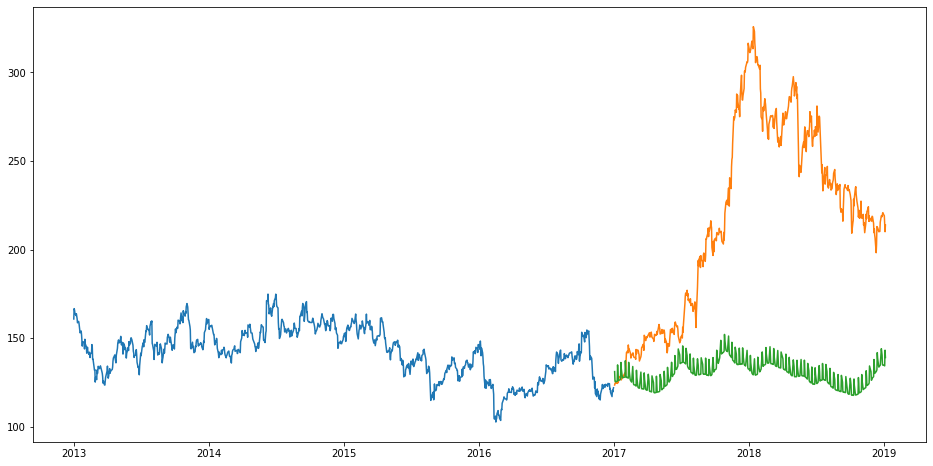

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.figure(figsize=(16,8))
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

### <font color='blue'> Inference:
### <font color='cyan'>Prophet (like most time series forecasting techniques) tries to capture the trend and seasonality from past data.</font>
### <font color='cyan'>However, stock prices do not have a particular trend or seasonality. It highly depends on what is currently going on in the market and thus the prices rise and fall.</font>

# =======================================================

## <font color=lightgreen>2. ARIMA(Auto-Regressive Integrated Moving Average)</font>

### <font color=blue>ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:</font>





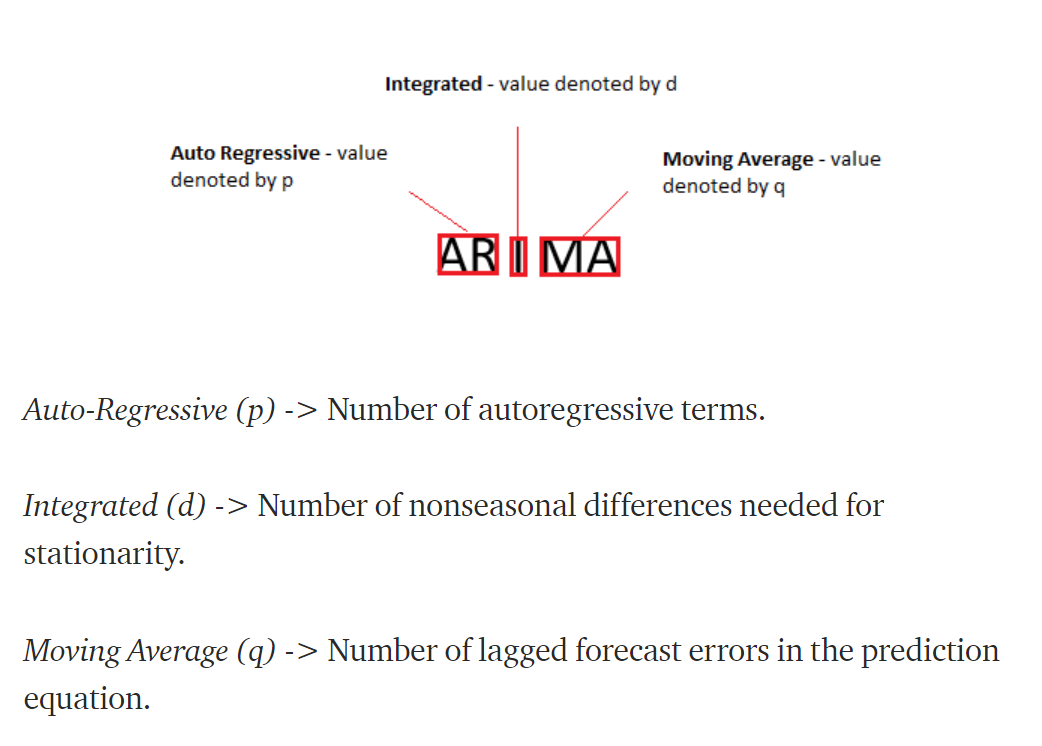

In [ ]:
Image(filename='arima_def.PNG')

### <font color=blue>Parameter tuning for ARIMA is time-consuming, so we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. </font>




### <font color=cyan>1.Univariate

In [ ]:
from pmdarima.arima import auto_arima
new_dat=df.copy()
new_dat = new_dat[['Date', 'Close']]
new_dat['Date'] = pd.to_datetime(new_dat.Date,format='%Y-%m-%d')
new_dat.index = new_dat['Date']
new_dat['year']=new_dat['Date'].apply(lambda x:x.year)
new_dat.rename(columns={'Date': 'ds','year':'yrs'}, inplace=True)
new_dat.drop('ds',axis=1,inplace=True)
train = new_dat[new_dat['yrs']<2017]
valid = new_dat[new_dat['yrs']>=2017]
train.drop('yrs',axis=1,inplace=True)
valid.drop('yrs',axis=1,inplace=True)
model = auto_arima(train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(train)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5418.231, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5147.508, Time=0.53 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5419.515, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5028.138, Time=1.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=16.84 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5026.145, Time=0.96 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5145.518, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=12.48 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=5.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5028.138, Time=1.54 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5029.991, Time=5.90 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5028

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  989
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2510.072
Date:                            Thu, 08 Oct 2020   AIC                           5026.145
Time:                                    22:30:09   BIC                           5040.795
Sample:                                         0   HQIC                          5031.720
                                            - 989                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6683      0.027    -24.735      0.000      -0.721      -0.615
ar.S.L24      -0.3443      0.028    -12.420      0.000      -0.399      -0.290
sigma2         9.9654      0.312     31.952      0.000       9.354      10.577
===================================================================================
Ljung-Box (Q):                      139.91   Jarque-Bera (JB):               198.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.14
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = model.predict(n_periods=498)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

137.04330013973384

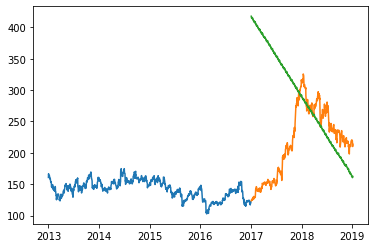

In [ ]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

### <font color=cyan>2.Multivariate

In [46]:
import statsmodels.api as sm
new_dat=df.copy()
new_dat = new_dat[['Date','Total Trade Quantity','Close']]
new_dat['Date'] = pd.to_datetime(new_dat.Date,format='%Y-%m-%d')
new_dat.index = new_dat['Date']
new_dat['year']=new_dat['Date'].apply(lambda x:x.year)
new_dat.rename(columns={'Date': 'ds','year':'yrs','Total Trade Quantity':'TTQ'}, inplace=True)
new_dat.drop('ds',axis=1,inplace=True)
train = new_dat[new_dat['yrs']<2017]
valid = new_dat[new_dat['yrs']>=2017]
train.drop('yrs',axis=1,inplace=True)
valid.drop('yrs',axis=1,inplace=True)
index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
train.reindex(index)
train['TTQ']=train['TTQ'].fillna(method='ffill')
train['Close']=train['Close'].fillna(method='ffill')
valid.reindex(index)
valid['TTQ']=valid['TTQ'].fillna(method='ffill')
valid['Close']=valid['Close'].fillna(method='ffill')
arimax = sm.tsa.statespace.SARIMAX(train['Close'], exog=train['TTQ'],
                                   enforce_invertibility=False, enforce_stationarity=False,
                                   order=(0,1,0),seasonal_order=(2, 1, 0, 12)).fit()
arimax.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: Settin

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  989
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2439.708
Date:                            Fri, 09 Oct 2020   AIC                           4887.416
Time:                                    06:45:03   BIC                           4906.850
Sample:                                         0   HQIC                          4894.820
                                            - 989                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TTQ         2.162e-07   2.82e-08      7.660      0.000    1.61e-07    2.72e-07
ar.S.L12      -0.6685      0.028    -24.024      0.000      -0.723      -0.614
ar.S.L24      -0.3415      0.029    -11.972      0.000      -0.397      -0.286
sigma2         9.8522      0.314     31.421      0.000       9.238      10.467
===================================================================================
Ljung-Box (Q):                      137.13   Jarque-Bera (JB):               212.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.39
Prob(H) (two-sided):                  0.53   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
arimax_results = valid.reset_index()

In [54]:
valid[['TTQ']]

,TTQ
Date,
2019-01-04,1213181.0
2019-01-03,2096553.0
2019-01-02,1081778.0
2019-01-01,716275.0
2018-12-31,965858.0
...,...
2017-01-06,1255021.0
2017-01-05,503565.0
2017-01-04,656213.0


In [55]:
frcst=arimax.forecast(steps=len(valid), exog=valid[['TTQ']])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(valid['Close'],frcst)

18888.220990397313

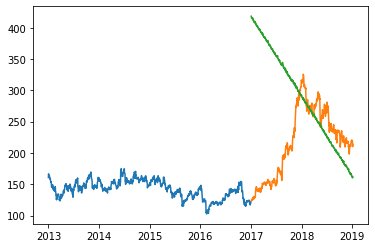

In [90]:
import matplotlib.pyplot as plt
p=pd.DataFrame({'Date':valid.index,'pred':frcst})
p['Date'] = pd.to_datetime(p.Date,format='%Y-%m-%d')
p.index = p['Date']
p.rename(columns={'Date': 'ds'}, inplace=True)
p.drop('ds',axis=1,inplace=True)
p
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(p['pred'])

## <font color=magenta>3. LSTM(Long Short Term Memory)</font>

### LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

### The input gate: The input gate adds information to the cell state
### The forget gate: It removes the information that is no longer required by the model
### The output gate: Output Gate at LSTM selects the information to be shown as output

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [163]:
def prepare_data(timeseries_data, n_steps):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [182]:
# define input sequence
timeseries_data = train[::-1]['Close'].values
# choose a number of time steps
n_steps = 60
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [183]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [184]:
X.shape

(929, 60, 1)

In [185]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=40, verbose=1)

Epoch 1/40
30/30 [==============================] - 5s 170ms/step - loss: 495915.1250
Epoch 2/40
30/30 [==============================] - 5s 165ms/step - loss: 956278.9375
Epoch 3/40
30/30 [==============================] - 5s 171ms/step - loss: 2568784.7500
Epoch 4/40
30/30 [==============================] - 5s 158ms/step - loss: 3403449.7500
Epoch 5/40
30/30 [==============================] - 5s 172ms/step - loss: 1853262.6250
Epoch 6/40
30/30 [==============================] - 5s 165ms/step - loss: 920659.7500
Epoch 7/40
30/30 [==============================] - 5s 168ms/step - loss: 526692.1875
Epoch 8/40
30/30 [==============================] - 5s 161ms/step - loss: 444689.0312
Epoch 9/40
30/30 [==============================] - 5s 160ms/step - loss: 278186.2812
Epoch 10/40
30/30 [==============================] - 5s 172ms/step - loss: 429819.8438
Epoch 11/40
30/30 [==============================] - 5s 174ms/step - loss: 408690.3750
Epoch 12/40
30/30 [==============================

In [174]:
# demonstrate prediction for 2017-2019
x_input = timeseries_data[n_steps*-1:]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<len(valid)):
    
    if(len(temp_input)>n_steps):
        x_input=array(temp_input[1:])
       
        
        x_input = x_input.reshape((1, n_steps, n_features))
     
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
 
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

[125.34944]


In [175]:
lst_output

[125.34944,
 128.25856,
 131.18665,
 133.68756,
 135.9295,
 138.04637,
 140.20097,
 142.32262,
 144.26001,
 146.03049,
 147.63768,
 149.03679,
 150.22298,
 151.20723,
 151.78201,
 151.92851,
 151.72588,
 151.2426,
 150.57333,
 149.34532,
 147.78331,
 146.05705,
 144.80061,
 143.68085,
 143.20181,
 143.39201,
 144.31914,
 145.48198,
 146.95374,
 148.48792,
 150.08798,
 151.74696,
 153.50533,
 155.43488,
 157.50635,
 159.60385,
 161.56396,
 163.27881,
 164.77328,
 166.15247,
 167.5625,
 169.10782,
 170.79327,
 172.55647,
 174.28348,
 175.82079,
 176.97357,
 177.47446,
 177.09163,
 175.90756,
 174.4678,
 173.29224,
 172.63596,
 172.48843,
 172.80658,
 173.449,
 174.21849,
 174.94849,
 175.53912,
 175.91347,
 176.05481,
 175.96797,
 175.70045,
 175.39433,
 175.24687,
 175.3472,
 175.68861,
 176.30057,
 177.16151,
 177.58562,
 177.48114,
 177.02107,
 176.55508,
 176.40137,
 176.65614,
 177.15506,
 177.62628,
 177.86533,
 177.82634,
 177.63748,
 177.50388,
 177.56006,
 177.7971,
 178.09224,


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


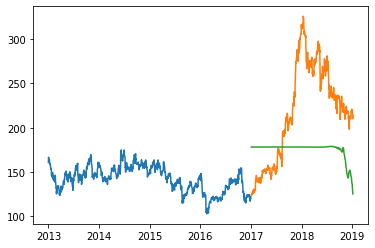

In [176]:
valid['pred']=lst_output
plt.plot(train['Close'])
plt.plot(valid[['Close','pred']])

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)